In [1]:
import pandas as pd
from pathlib import Path

# Caminho do dataset limpo
CLEAN_PATH = Path("../data/clean/creditcard_clean.csv")

# Ler CSV limpo
df = pd.read_csv(CLEAN_PATH)

# Mostrar primeiras linhas
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Features e target
X = df.drop('Class', axis=1)
y = df['Class']

print("Shape das features:", X.shape)
print("Shape do target:", y.shape)


Shape das features: (283726, 30)
Shape do target: (283726,)


In [5]:
from sklearn.model_selection import train_test_split

# Divisão treino 70% / teste 30%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Treino:", X_train.shape, "Teste:", X_test.shape)


Treino: (198608, 30) Teste: (85118, 30)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Criar modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Treinar modelo
rf.fit(X_train, y_train)

# Prever no teste
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

# Avaliar modelo
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
[[84972     4]
 [   41   101]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.96      0.71      0.82       142

    accuracy                           1.00     85118
   macro avg       0.98      0.86      0.91     85118
weighted avg       1.00      1.00      1.00     85118

ROC-AUC: 0.9315914137148251


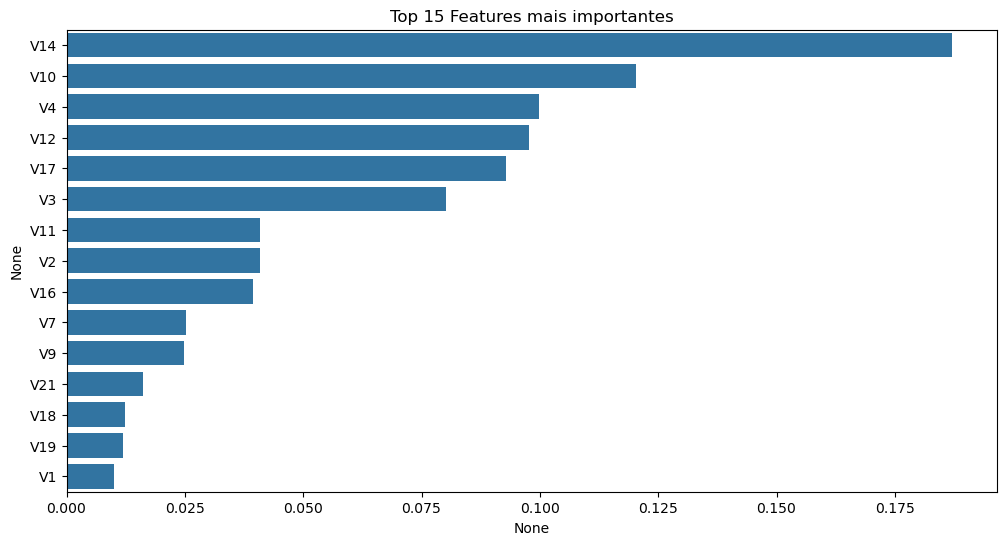

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Importância das features
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=feat_importances[:15], y=feat_importances.index[:15])
plt.title("Top 15 Features mais importantes")
plt.show()


In [11]:
import joblib

# Criar pasta models se não existir
Path("../models").mkdir(parents=True, exist_ok=True)

# Salvar modelo
joblib.dump(rf, "../models/rf_creditcard_model.pkl")
print("Modelo salvo em ../models/rf_creditcard_model.pkl")


Modelo salvo em ../models/rf_creditcard_model.pkl
